<a href="https://colab.research.google.com/github/dealbujav/CE888/blob/master/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Boostrap


In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
    boostrap = np.random.choice(sample, (n_iterations, sample_size), replace=True)
    data_mean = np.mean(boostrap)
    mean_list=[]
    for i in range (len(boostrap)):
        n_sample = boostrap[i,:]
        sample_mean = np.mean(n_sample)
        mean_list.append(sample_mean)
    lower = np.percentile(mean_list, 2.5)
    upper = np.percentile(mean_list, 97.5)
    return data_mean, lower, upper



(0, 100000)

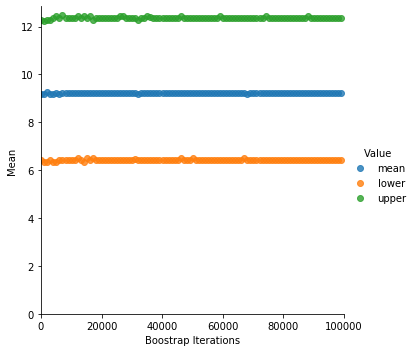

In [52]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.

In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
    boostrap = np.random.choice(sample, (n_iterations, sample_size), replace=True)
    data_mean = np.mean(boostrap)
    mean_list=[]
    for i in range (len(boostrap)):
        n_sample = boostrap[i,:]
        sample_mean = np.mean(n_sample)
        mean_list.append(sample_mean)
    lower = np.percentile(mean_list, ((100-ci)/2))
    upper = np.percentile(mean_list, (ci+(100-ci)/2))
    return data_mean, lower, upper

(0, 100000)

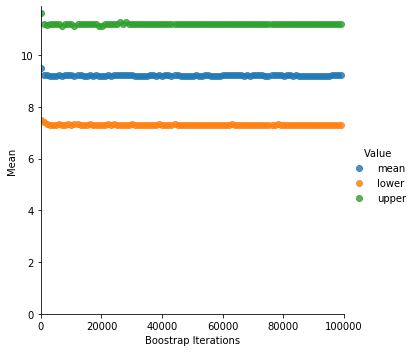

In [54]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

##Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [0]:
# Load and visualise the vehicles dataset
ve = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

In [56]:
ve

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


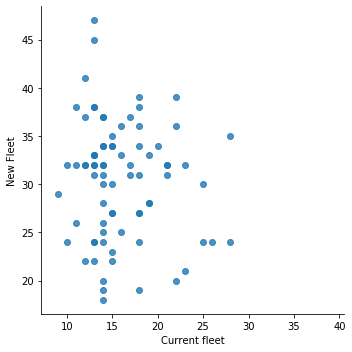

In [57]:
#plotting data
#Scatter plot
sns.lmplot(ve.columns[0], ve.columns[1], data=ve, fit_reg=False)

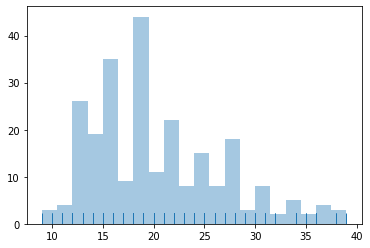

In [58]:
#plotting data
#histogram current fleet
data1 = ve[ve.columns[0]].values
sns.distplot(data1, bins=20, kde=False, rug=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


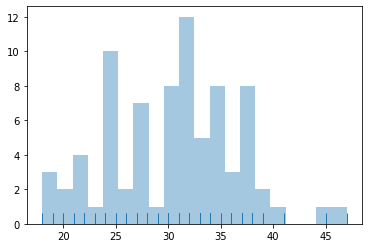

In [59]:
#plotting data
#histogram new fleet
data2 = ve[ve.columns[1]].values
sns.distplot(data2, bins=20, kde=False, rug=True)

In [60]:
#means
x = ve[~np.isnan(ve)]
mean = np.mean(x)

print(mean)

Current fleet    20.144578
New Fleet        30.481013
dtype: float64


In [79]:
#Difference
tobs = 30.481013-20.144578
tobs

10.336435000000002

In [72]:
#Upper an lower bound of current fleet

boots = []
boot = boostrap_mean_ci(data1, data1.shape[0], i, 80)
boots.append([i, boot[0], "mean"])
boots.append([i, boot[1], "lower"])
boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
print(df_boot)

   Boostrap Iterations       Mean  Value
0                99100  20.146762   mean
1                99100  19.630522  lower
2                99100  20.666667  upper


In [73]:
#Upper an lower bound of new fleet

datana = data2[np.logical_not(np.isnan(data2))]

boots = []
boot = boostrap_mean_ci(datana, datana.shape[0], i, 80)
boots.append([i, boot[0], "mean"])
boots.append([i, boot[1], "lower"])
boots.append([i, boot[2], "upper"])

df_boot2 = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
print(df_boot2)

   Boostrap Iterations       Mean  Value
0                99100  30.481623   mean
1                99100  29.607595  lower
2                99100  31.354430  upper


In [81]:
#Permutation test
concat = np.concatenate((data1, datana))
#for i in range (20000)
perm = np.random.permutation(concat)
pcurrent = perm[:249]
pnew = perm[79:]
tperm = np.mean(pnew) - np.mean(pcurrent)

print(tperm)

#for i in range ()

0.28915662650602414
